In [1]:
import pandas as pd
import numpy as np

In [2]:
tr=pd.read_csv('train.csv')
ts = pd.read_csv('test.csv')

In [3]:
print('train',tr.shape)
print('test', ts.shape)

train (1460, 81)
test (1459, 80)


In [4]:
tr.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

In [6]:
tr.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

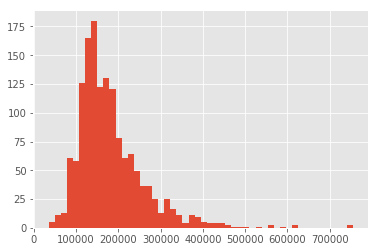

In [7]:
plt.hist(tr.SalePrice, bins=50);

In [8]:
target=np.log(tr.SalePrice)

In [9]:
import seaborn as sns

The skew value is 0.121335062205


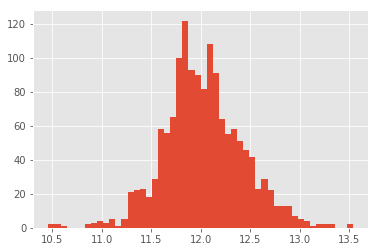

In [10]:
print('The skew value is',target.skew())
plt.hist(target,bins=50);

In [11]:
numeric_features = tr.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [12]:
corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [13]:
tr.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

OverallQual     1      2      3       4       5       6       7       8   \
SalePrice    50150  60000  86250  108000  133000  160000  200141  269750   

OverallQual      9       10  
SalePrice    345000  432390  


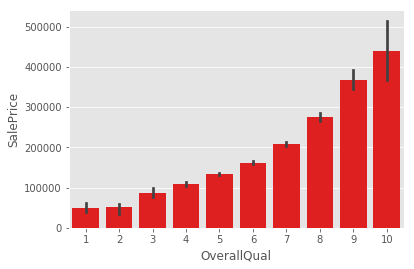

In [14]:
quality_pivot=tr.pivot_table(columns='OverallQual',values='SalePrice', aggfunc='median')
print(quality_pivot)
sns.barplot(x='OverallQual', y='SalePrice', data=tr, color='r');

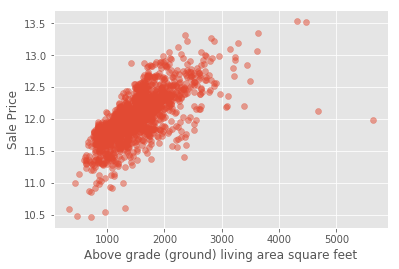

In [15]:
plt.scatter(y=target,x=tr.GrLivArea, alpha=0.5)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet');

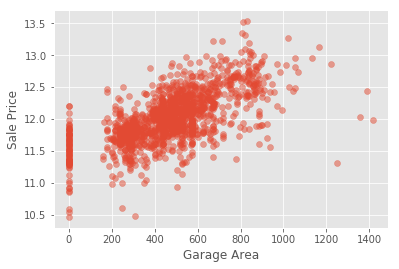

In [16]:
plt.scatter(y=target,x=tr.GarageArea, alpha=0.5)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area');

In [17]:
tr = tr[tr['GarageArea'] < 1200]

Text(0.5,0,'Garage Area')

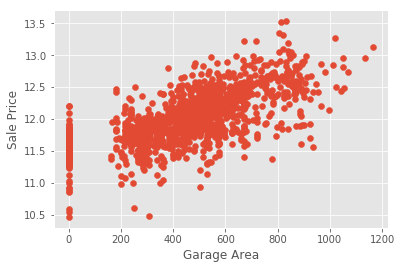

In [18]:
plt.scatter(x=tr['GarageArea'], y=np.log(tr.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')

In [19]:
nulls = pd.DataFrame(tr.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [20]:
print ("Unique values are:", tr.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [21]:
categoricals = tr.select_dtypes(exclude=[np.number])
pd.set_option("display.max_columns",50)
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1447,1455,1455,1455,1418,1418,1417,1418,1417,1455,1455,1455,1454,1455,1455,766,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,1441,1216,722,1139,1430,514,503,863,905,1278,644,647,1306,951,428,1251,1423,737,1360,1329,733,1355,377,867,605,1306,1321,1335,2,157,48,1266,1196


In [27]:
tr['enc_street'] = pd.get_dummies(tr.Street, drop_first=True)
ts['enc_street'] = pd.get_dummies(ts.Street, drop_first=True)

In [28]:
print ("Original: \n") 
print (tr.enc_street.value_counts(), "\n")

Original: 

1    1450
0       5
Name: enc_street, dtype: int64 



In [29]:
tr['enc_street'] = pd.get_dummies(tr.Street, drop_first=True)
ts['enc_street'] = pd.get_dummies(tr.Street, drop_first=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

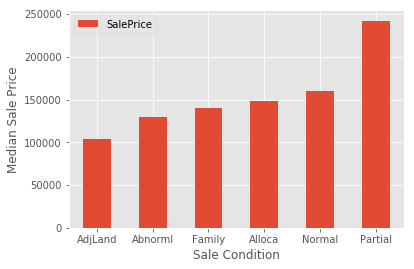

In [30]:
condition_pivot = tr.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median).sort_values(by='SalePrice')
condition_pivot.plot(kind='bar')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

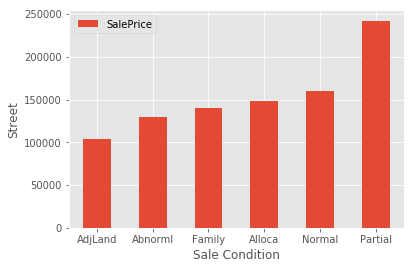

In [31]:
sreet_pivot = tr.pivot_table(index='Street',
                                    values='SalePrice', aggfunc=np.median).sort_values(by='SalePrice')
condition_pivot.plot(kind='bar')
plt.xlabel('Sale Condition')
plt.ylabel('Street')
plt.xticks(rotation=0)

In [32]:
def encode(x): return 1 if x == 'Partial' else 0
tr['enc_condition'] = tr.SaleCondition.apply(encode)
ts['enc_condition'] = ts.SaleCondition.apply(encode)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

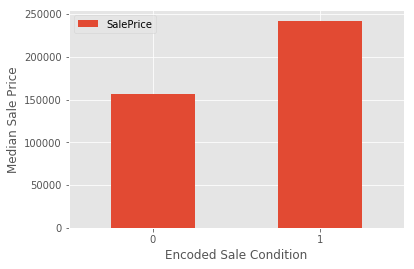

In [33]:
condition_pivot = tr.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

In [34]:
data = tr.select_dtypes(include=[np.number]).interpolate().dropna()

In [35]:
sum(data.isnull().sum() != 0)

0

In [36]:
y = np.log(tr.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [37]:
X.shape

(1455, 38)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [39]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [40]:
model = lr.fit(X_train, y_train)

In [41]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.888247770926


In [42]:
predictions = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.0178417945196


Text(0.5,1,'Linear Regression Model')

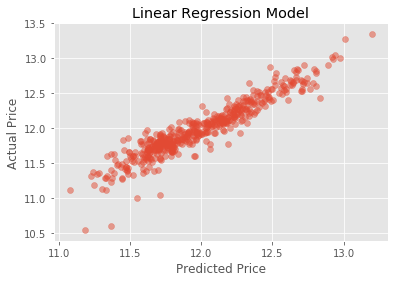

In [44]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.5) #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

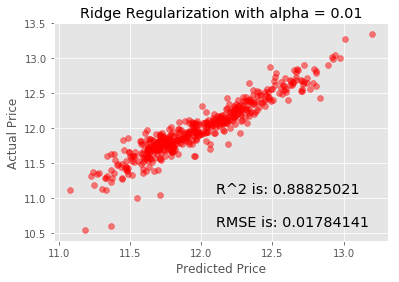

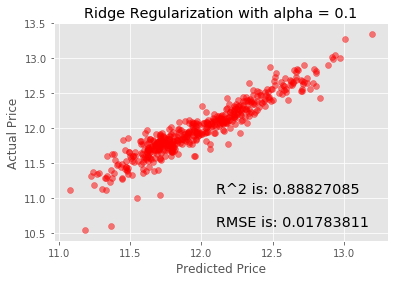

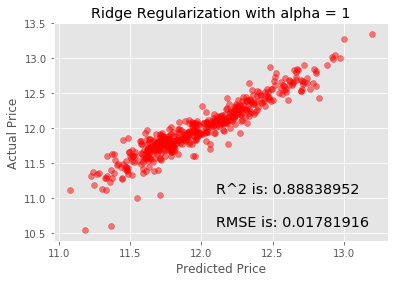

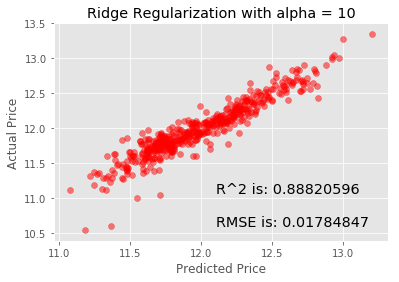

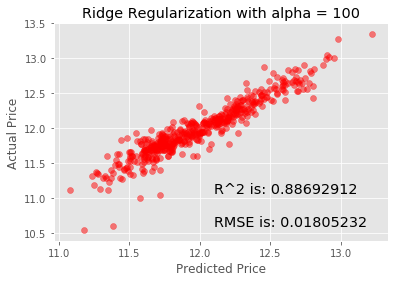

In [45]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.5, color='red')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\n\nRMSE is: {}'.format(
                    round(ridge_model.score(X_test, y_test),8),
                    round(mean_squared_error(y_test, preds_ridge),8))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [46]:
submission = pd.DataFrame()
submission['Id'] = ts.Id

In [47]:
feats = ts.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [48]:
predictions = model.predict(feats)

In [49]:
final_predictions = np.exp(predictions)

In [50]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [ 11.76725362  11.71929504  12.07656074  12.20632678  12.11217655] 

Final predictions are: 
 [ 128959.49172586  122920.74024361  175704.82598102  200050.83263755
  182075.46986404]


In [51]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [52]:
submission.to_csv('submission1.csv', index=False)